In [34]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
import plotly.graph_objects as go
import plotly.express as px
from plotly.subplots import make_subplots
import numpy as np 
import re
import nltk
from textblob import TextBlob
import seaborn as sns

# Data Cleaning and Preliminary analysis for Tesla Stock Price Dataset


I obtained the dataset from Yahoo Finance containing the stock price of Tesla from 2022 to 2023. 
Below, I performed data cleaning and preliminary data analysis, which involved exploring the
dataset using line graphs, histograms, and box plots to better understand its characteristics

In [35]:
df_stock=pd.read_csv("TSLA-3.csv")
df_stock.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2022-01-03,382.583344,400.356659,378.679993,399.926666,399.926666,103931400
1,2022-01-04,396.516663,402.666656,374.350006,383.196655,383.196655,100248300
2,2022-01-05,382.216675,390.113342,360.336670,362.706665,362.706665,80119800
3,2022-01-06,359.000000,362.666656,340.166656,354.899994,354.899994,90336600
4,2022-01-07,360.123322,360.309998,336.666656,342.320007,342.320007,84164700


In [36]:
df_stock.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 417 entries, 0 to 416
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       417 non-null    object 
 1   Open       417 non-null    float64
 2   High       417 non-null    float64
 3   Low        417 non-null    float64
 4   Close      417 non-null    float64
 5   Adj Close  417 non-null    float64
 6   Volume     417 non-null    int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 22.9+ KB


In [37]:
df_stock.describe()

,Open,High,Low,Close,Adj Close,Volume
count,417.000000,417.000000,417.000000,417.000000,417.000000,4.170000e+02
mean,240.273149,245.957474,233.998049,239.892933,239.892933,1.104735e+08
std,60.679810,61.805271,58.974061,60.150422,60.150422,4.435294e+07
min,103.000000,111.750000,101.809998,108.099998,108.099998,4.186470e+07
25%,191.649994,196.250000,186.339996,191.300003,191.300003,7.695630e+07
50%,240.086670,246.669998,233.750000,239.706665,239.706665,9.886660e+07
75%,286.630005,292.286682,277.600006,286.630005,286.630005,1.361337e+08
max,396.516663,402.666656,378.679993,399.926666,399.926666,3.065906e+08


In [46]:
# change date to datetime
df_stock["Date"]=pd.to_datetime(df_stock['Date'])

In [47]:
#sort data by date
df_stock.sort_values(by="Date", inplace=True)

Stock Price Time series graph to see trends, sesonality patterns, and changes in data over time. Ploted two one for close and open stock price

In [48]:
import plotly.graph_objects as go

# Create a trace for the line plot
trace = go.Scatter(x=df_stock['Date'], y=df_stock['Close'], mode='lines+markers', 
                   line=dict(color='skyblue'), marker=dict(symbol='circle', size=8), 
                   name='Close Stock Price')

# Create the layout
layout = go.Layout(title='Close Stock Price Time Series for Tesla for 2022',
                   xaxis=dict(title='Date'),
                   yaxis=dict(title='Stock Price'))

# Create the figure and add the trace
fig = go.Figure(data=[trace], layout=layout)

# Show the figure
fig.show()


In [49]:
import plotly.graph_objects as go

# Create a trace for the line plot
trace = go.Scatter(x=df_stock['Date'], y=df_stock['Open'], mode='lines+markers', 
                   line=dict(color='red'), marker=dict(symbol='circle', size=8), 
                   name='Open Stock Price')

# Create the layout
layout = go.Layout(title='Open Stock Price Time Series for Tesla for 2022',
                   xaxis=dict(title='Date'),
                   yaxis=dict(title='Stock Price'))

# Create the figure and add the trace
fig = go.Figure(data=[trace], layout=layout)

# Show the figure
fig.show()


Just by looking at the graph, it's evident that the data is not stationary, exhibiting trends and seasonality over time. There are also various other methods to determine whether the data is stationary or not. 
Additionally, it's important to implement techniques to make the data stationary when using it for prediction


In [50]:
# month wise comparision of stock open and close price

monthwise= df_stock.groupby(df_stock['Date'].dt.strftime('%B'))[['Open','Close']].mean()
new_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 
             'September', 'October', 'November', 'December']
monthwise= monthwise.reindex(new_order, axis=0)
monthwise


,Open,Close
Date,,
January,236.043000,235.459415
February,245.483947,246.368420
March,245.839276,246.657898
April,259.436754,256.702565
May,214.923410,214.587674
June,239.265795,240.058175
July,261.753084,262.450083
August,269.933555,268.835260
September,287.885710,288.734763


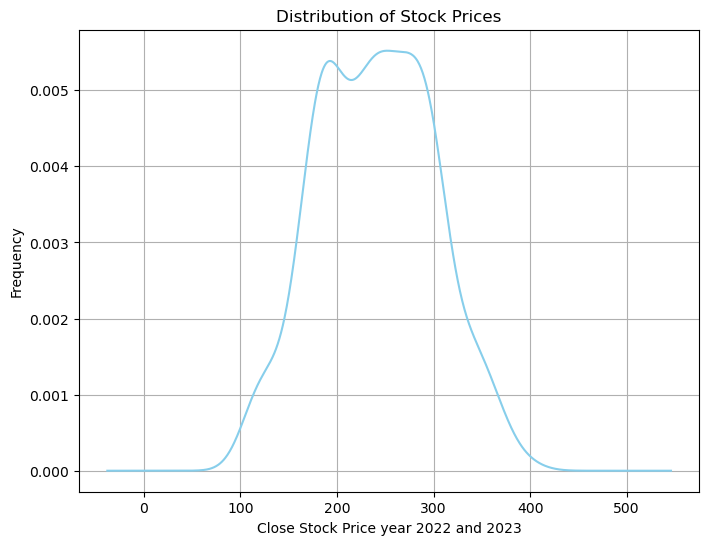

In [51]:

# Plotting the distribution graph
plt.figure(figsize=(8, 6))
df_stock['Close'].plot(kind='density', color='skyblue')
plt.title('Distribution of Stock Prices')
plt.xlabel('Close Stock Price year 2022 and 2023')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

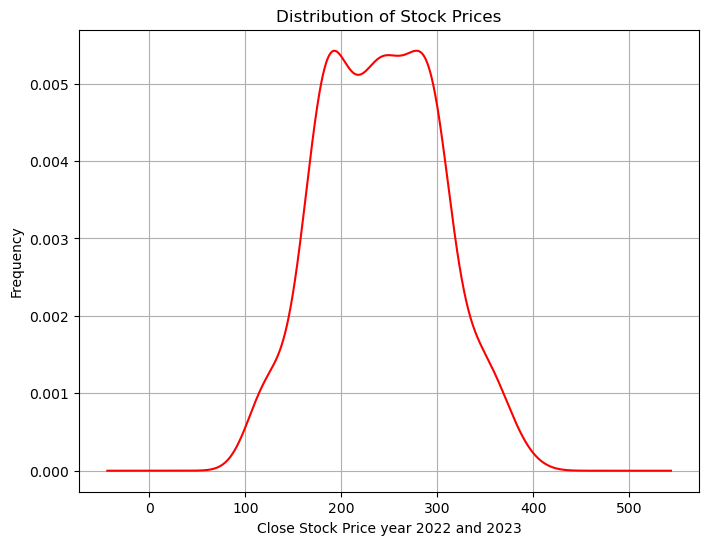

In [52]:

# Plotting the distribution graph
plt.figure(figsize=(8, 6))
df_stock['Open'].plot(kind='density', color='red')
plt.title('Distribution of Stock Prices')
plt.xlabel('Close Stock Price year 2022 and 2023')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

Both the close and open stock prices exhibit a bell-shaped distribution, indicating that they are normally distributed. 
This characteristic makes them suitable for linear prediction methods, which rely on the assumption of normality in the 
data distribution. Therefore, the normal distribution of both close and open stock prices enhances the applicability and effectiveness of linear prediction techniques

In [53]:
df_stock.groupby(df_stock['Date'].dt.strftime('%B'))['Low'].min()
monthwise_high = df_stock.groupby(df_stock['Date'].dt.strftime('%B'))['High'].max()
monthwise_high = monthwise_high.reindex(new_order, axis=0)

monthwise_low = df_stock.groupby(df_stock['Date'].dt.strftime('%B'))['Low'].min()
monthwise_low = monthwise_low.reindex(new_order, axis=0)

fig = go.Figure()
fig.add_trace(go.Bar(
    x=monthwise_high.index,
    y=monthwise_high,
    name='Stock high Price',
    marker_color='rgb(0, 153, 204)'
))
fig.add_trace(go.Bar(
    x=monthwise_low.index,
    y=monthwise_low,
    name='Stock low Price',
    marker_color='rgb(255, 128, 0)'
))

fig.update_layout(barmode='group', 
                  title=' Monthwise High and Low stock price')
fig.show()

In [54]:
fig = go.Figure()

fig.add_trace(go.Bar(
    x=monthwise.index,
    y=monthwise['Open'],
    name='Stock Open Price',
    marker_color='crimson'
))
fig.add_trace(go.Bar(
    x=monthwise.index,
    y=monthwise['Close'],
    name='Stock Close Price',
    marker_color='lightsalmon'
))

fig.update_layout(barmode='group', xaxis_tickangle=-45, 
                  title='Monthwise comparision between Stock open and close price')
fig.show()

In [51]:
fig = px.line(df_stock_close, x=df_stock_close.index, y=df_stock_close.Close,labels={'date':'Date','close':'Close Stock'})
fig.update_traces(marker_line_width=2, opacity=0.8)
fig.update_layout(title_text='Stock close price chart', plot_bgcolor='white', font_size=15, font_color='black')
fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False)
fig.show()

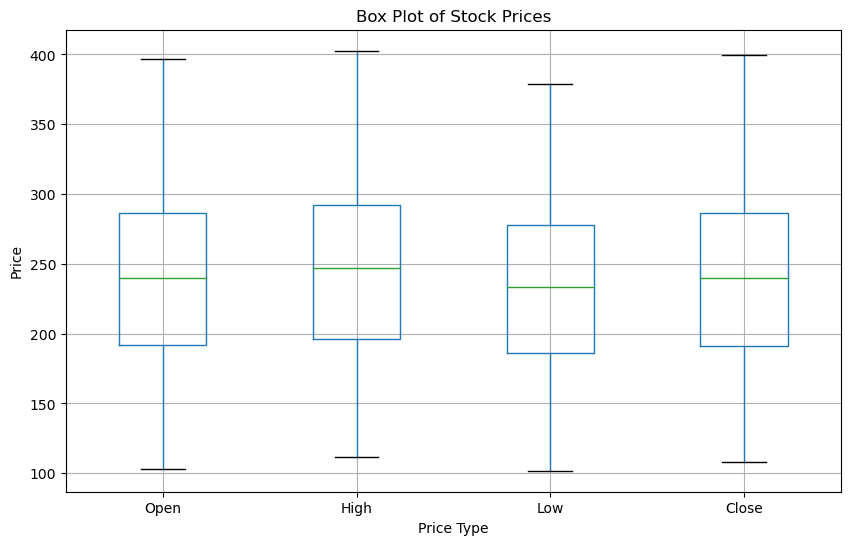

In [52]:
plt.figure(figsize=(10, 6))
df_stock.boxplot(column=['Open', 'High', 'Low', 'Close'])
plt.title('Box Plot of Stock Prices')
plt.xlabel('Price Type')
plt.ylabel('Price')
plt.grid(True)
plt.show()


As shown in the above Box plots are valuable no outliers in the stock prices data. So I might need to add data to see any significant market events that requires further investigation. all he median, .

By examining the box plot it shows it is symmetric which has good implication for modling and forcasting future prices.



In [19]:
# make the date column as index
df_stock_close=df_stock[["Date", "Close"]]
df_stock_close.index=df_stock_close["Date"]
df_stock_close.drop("Date", axis=1, inplace=True)
df_stock_close.head()

Since both close and open has almost similar pattern I decided to use one of them. 
I selected close to use it for my prediction

# Data Cleaning and Exploratory data Analysis for Twitter Data

In [55]:


twitter_data=pd.read_csv("cleandata.csv")

In [59]:
twitter_data.head()

,Tweets,Retweets,Likes,Date,Cleaned_Tweets
0,@PeterSchiff 🤣 thanks,209,7021,2022-10-27 16:17:39,thanks
1,@ZubyMusic Absolutely,755,26737,2022-10-27 13:19:25,Absolutely
2,Dear Twitter Advertisers https://t.co/GMwHmInPAS,55927,356623,2022-10-27 13:08:00,Dear Twitter Advertisers
3,Meeting a lot of cool people at Twitter today!,9366,195546,2022-10-26 21:39:32,Meeting a lot of cool people at Twitter today!
4,Entering Twitter HQ – let that sink in! https:...,145520,1043592,2022-10-26 18:45:58,Entering Twitter HQ – let that sink in!


In [60]:
twitter_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2668 entries, 0 to 2667
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Tweets          2668 non-null   object        
 1   Retweets        2668 non-null   int64         
 2   Likes           2668 non-null   int64         
 3   Date            2668 non-null   datetime64[ns]
 4   Cleaned_Tweets  2668 non-null   object        
dtypes: datetime64[ns](1), int64(2), object(2)
memory usage: 104.3+ KB


In [61]:
twitter_data["Date"]=pd.to_datetime(twitter_data["Date"])

get the subjectivity and polarity as well as sentiment value(postive, negative or neutral) using textblob

In [64]:

def getPolarity(text):
    return TextBlob(text).sentiment.polarity

def getSubjectivity(text):
    return TextBlob(text).sentiment.subjectivity

#creating another user define function to label the sentiment 

def getSentiment(value):
    if value<0:
        return 'Negative'
    elif value>0:
        return 'Positive'
    else:
        return 'Neutral'

In [66]:
twitter_data['Date'] = twitter_data['Date'].astype(str)
twitter_data['Polarity']=twitter_data['Cleaned_Tweets'].apply(getPolarity)
twitter_data['Subjectivity']=twitter_data['Cleaned_Tweets'].apply(getSubjectivity)
twitter_data['Sentiment']=twitter_data['Polarity'].apply(getSentiment)
twitter_data['Date']=twitter_data.Date.str.slice(0,10)
twitter_data['Month']=pd.DatetimeIndex(twitter_data['Date']).month
twitter_data.head()

,Tweets,Retweets,Likes,Date,Cleaned_Tweets,Polarity,Subjectivity,Sentiment,Month
0,@PeterSchiff 🤣 thanks,209,7021,2022-10-27,thanks,0.2000,0.20,Positive,10
1,@ZubyMusic Absolutely,755,26737,2022-10-27,Absolutely,0.2000,0.90,Positive,10
2,Dear Twitter Advertisers https://t.co/GMwHmInPAS,55927,356623,2022-10-27,Dear Twitter Advertisers,0.0000,0.00,Neutral,10
3,Meeting a lot of cool people at Twitter today!,9366,195546,2022-10-26,Meeting a lot of cool people at Twitter today!,0.4375,0.65,Positive,10
4,Entering Twitter HQ – let that sink in! https:...,145520,1043592,2022-10-26,Entering Twitter HQ – let that sink in!,0.0000,0.00,Neutral,10


In [67]:
twitter_data["Date"]=pd.to_datetime(twitter_data["Date"])

plotted a histogram for subjectivity and polarity to see their distribution. As it is shown subjectivity
not bell shped however polarity is bell shaped normaly distributed

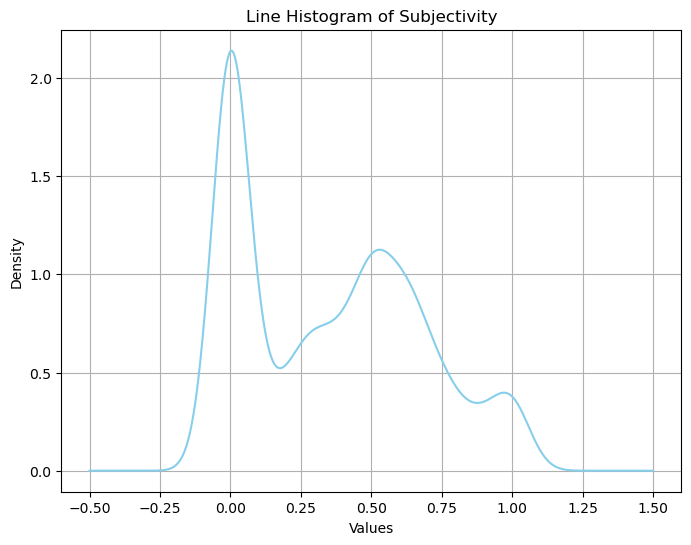

In [69]:
# Plotting the histogram
plt.figure(figsize=(8, 6))
twitter_data['Subjectivity'].plot(kind='density', color='skyblue')
plt.title('Line Histogram of Subjectivity')
plt.xlabel('Values')
plt.ylabel('Density')
plt.grid(True)
plt.show()

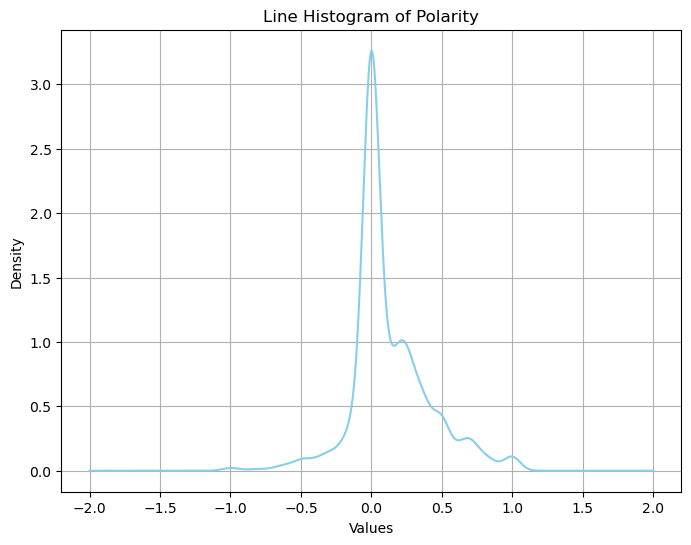

In [70]:
# Plotting the histogram
plt.figure(figsize=(8, 6))
twitter_data['Polarity'].plot(kind='density', color='skyblue')
plt.title('Line Histogram of Polarity')
plt.xlabel('Values')
plt.ylabel('Density')
plt.grid(True)
plt.show()

In [ ]:
I created a pie chart to visualize the proportions of neutral, positive, and negative sentiment values

/var/folders/bj/5l9j678937s59szhh63bt1yr0000gp/T/ipykernel_24993/3687569648.py:1: MatplotlibDeprecationWarning:

The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.



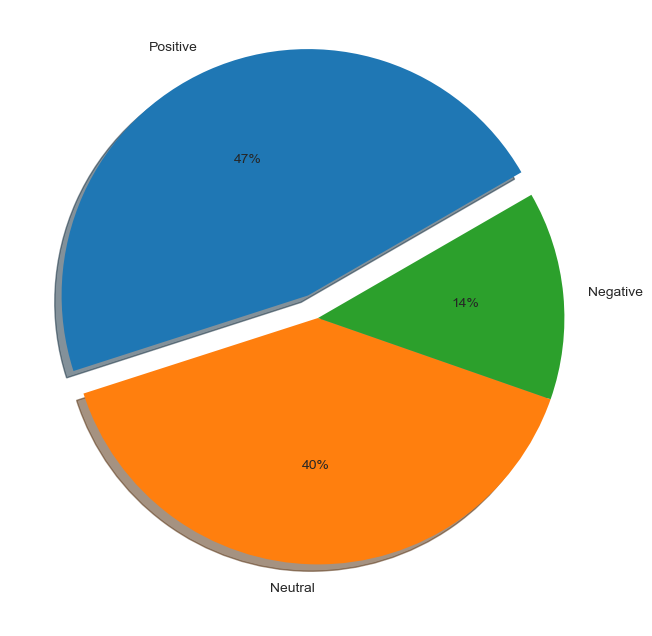

In [71]:
plt.style.use('seaborn-darkgrid')
plt.figure(figsize=(10,8))

values=twitter_data['Sentiment'].value_counts()
label=['Positive','Neutral','Negative']
explode=[0.1,0,0]

plt.pie(values,labels=label,explode=explode,autopct='%.0f%%',shadow=True,startangle=30)
plt.show()

/var/folders/bj/5l9j678937s59szhh63bt1yr0000gp/T/ipykernel_24993/888997462.py:19: MatplotlibDeprecationWarning:

The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.



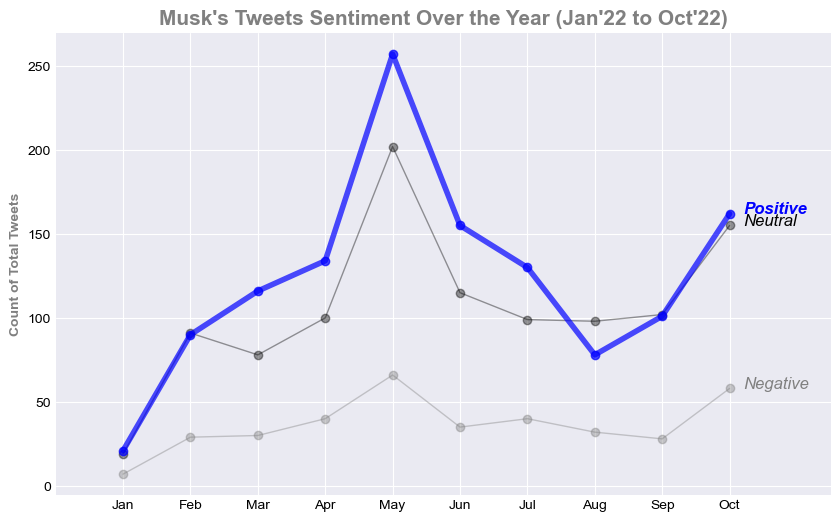

In [72]:
positive=[]
neutral=[]
negative=[]

for i in twitter_data['Month'].unique():
    
    pos=twitter_data.loc[(twitter_data['Month']==i) & (twitter_data['Sentiment']=='Positive'),'Sentiment'].count()
    positive.append(pos)
    
    neu=twitter_data.loc[(twitter_data['Month']==i) & (twitter_data['Sentiment']=='Neutral'),'Sentiment'].count()
    neutral.append(neu)
    
    neg=twitter_data.loc[(twitter_data['Month']==i) & (twitter_data['Sentiment']=='Negative'),'Sentiment'].count()
    negative.append(neg)

date=twitter_data['Month'].unique().tolist()
month=['Oct','Sep','Aug','Jul','Jun','May','Apr','Mar','Feb','Jan']

plt.style.use('seaborn-darkgrid')

plt.figure(figsize=(10,6))

plt.plot(date,neutral,marker='o',color='black',linewidth=1, alpha=0.4)
plt.plot(date,negative,marker='o',color='grey',linewidth=1, alpha=0.4)
plt.plot(date,positive,marker='o',color='blue',linewidth=4, alpha=0.7)

plt.xlim(0,11.5)

plt.text(10.2,neutral[0],'Neutral',horizontalalignment='left',color='black',fontsize='large',fontstyle='italic',fontweight='regular')
plt.text(10.2,negative[0],'Negative',horizontalalignment='left',color='grey',fontsize='large',fontstyle='italic',fontweight='regular')
plt.text(10.2,positive[0],'Positive',horizontalalignment='left',color='blue',fontsize='large',fontstyle='italic',fontweight='semibold')

plt.xticks(date,labels=month,color='black',fontsize='medium',fontweight='medium')
plt.yticks(color='black',fontsize='medium',fontweight='medium')

plt.title("Musk's Tweets Sentiment Over the Year (Jan'22 to Oct'22)",loc='center',color='grey',fontsize=15,fontweight='semibold')
plt.ylabel("Count of Total Tweets",color='grey',fontsize=10,fontweight='semibold')
#plt.savefig('tweet over the time.png')
plt.show()

the above time series graph shows the total count of tweets per mont made by Tesla CEO elon musk in each category of sentiment(postive, negative, neutral)

In [77]:
# Convert 'Date' column to datetime type
average_sentiment_df['Date'] = pd.to_datetime(average_sentiment_df['Date'])
df_stock['Date'] = pd.to_datetime(df_stock['Date'])




# Merge datasets by 'Date' column using an outer join
twitter_stock_df = pd.merge(df_stock, average_sentiment_df,  on='Date')

twitter_stock_df.head()
twitter_stock_df.set_index('Date', inplace=True)  # Set the 'Date' column as the index

# Filter stock close prices only for the year 2022
twitter_stock_2022 = twitter_stock_df.loc['2022']

twitter_stock_2022

,Open,High,Low,Close,Adj Close,Volume,Polarity
Date,,,,,,,
2022-01-27,311.119995,311.796661,276.333344,276.366669,276.366669,147109500,0.083750
2022-01-28,277.186676,285.833344,264.003326,282.116669,282.116669,134789100,0.073361
2022-01-31,290.903320,312.663330,287.350006,312.239990,312.239990,104436000,-0.100000
2022-02-01,311.736664,314.566681,301.666656,310.416656,310.416656,73138200,0.061089
2022-02-02,309.393341,310.500000,296.470001,301.886658,301.886658,66792900,0.115071
...,...,...,...,...,...,...,...
2022-10-21,206.419998,214.660004,203.800003,214.440002,214.440002,75713800,0.065181
2022-10-24,205.820007,213.500000,198.589996,211.250000,211.250000,100446800,0.181952
2022-10-25,210.100006,224.350006,210.000000,222.419998,222.419998,96507900,0.079981


In the above dataset I merged the two datasets twitter data and stock price data

In [78]:
# Select only four variables
selected_variables = twitter_stock_2022[['Polarity', 'Close', 'Open']]

# Create a new DataFrame with selected columns
new_df = pd.DataFrame(selected_variables)

# Compute correlation matrix using Pearson correlation
pearson_corr = new_df.corr(method='pearson')

# Compute correlation matrix using Spearman rank correlation
spearman_corr = new_df.corr(method='spearman')

# Compute correlation matrix using Kendall tau correlation
kendall_corr = new_df.corr(method='kendall')

print("Pearson Correlation Matrix:")
print(pearson_corr)
print("\nSpearman Correlation Matrix:")
print(spearman_corr)
print("\nKendall Tau Correlation Matrix:")
print(kendall_corr)


Pearson Correlation Matrix:
          Polarity     Close      Open
Polarity  1.000000  0.104445  0.078031
Close     0.104445  1.000000  0.968455
Open      0.078031  0.968455  1.000000

Spearman Correlation Matrix:
          Polarity     Close      Open
Polarity  1.000000  0.097781  0.066963
Close     0.097781  1.000000  0.953935
Open      0.066963  0.953935  1.000000

Kendall Tau Correlation Matrix:
          Polarity     Close      Open
Polarity  1.000000  0.062272  0.042204
Close     0.062272  1.000000  0.820133
Open      0.042204  0.820133  1.000000


Text(0.5, 1.0, 'Pearson Correlation')

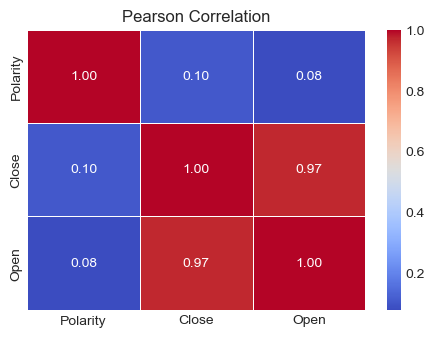

In [79]:
# Draw the heatmaps
plt.figure(figsize=(12, 8))

# Pearson correlation heatmap
plt.subplot(2, 2, 1)
sns.heatmap(pearson_corr, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Pearson Correlation')

"In the heatmap above, I attempted to analyze the correlation between the merged variables: 
open and close stock prices, and sentiment polarity. As depicted, 
there isn't any significant correlation between sentiment values and stock prices for the year 2022. 
Therefore, I may need to include data from previous years to identify any significant correlations

/var/folders/bj/5l9j678937s59szhh63bt1yr0000gp/T/ipykernel_7843/2376330122.py:7: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



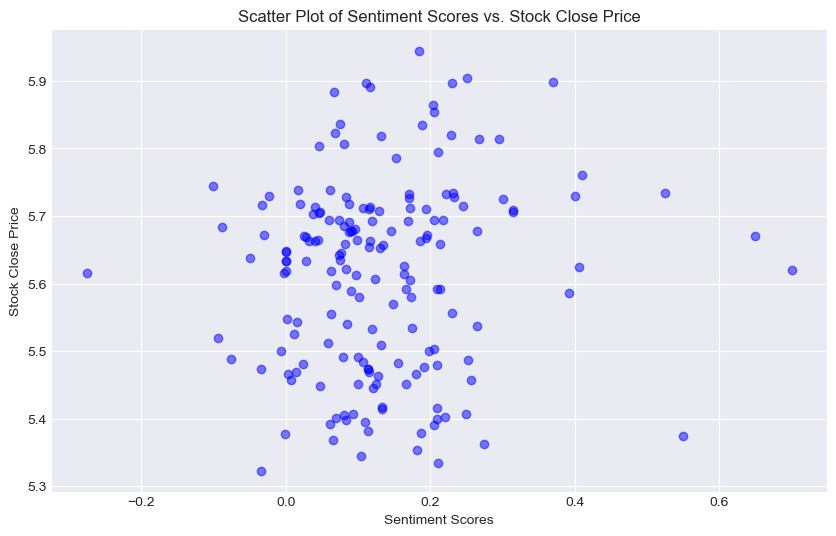

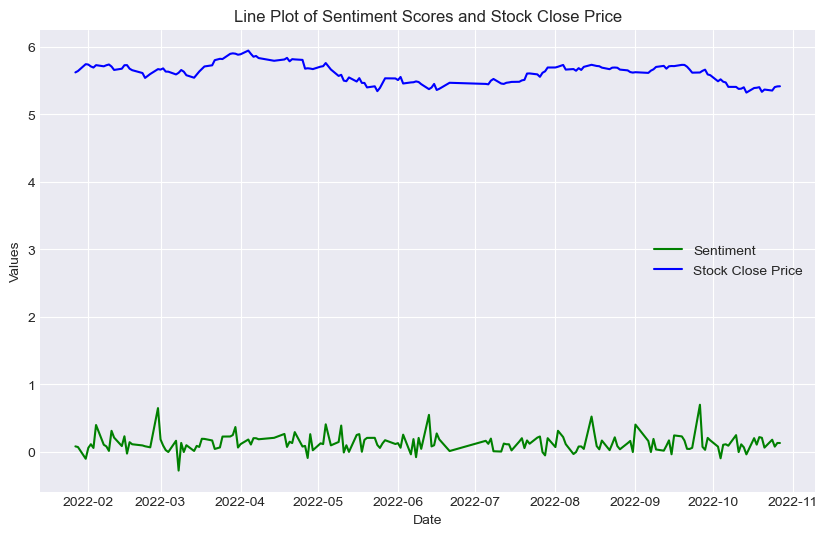

In [127]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming twitter_stock_df contains 'Date', 'Sentiment', 'Close' columns

# Take the natural logarithm of stock prices
twitter_stock_2022['Log_Close'] = np.log(twitter_stock_2022['Close'])

# Sample DataFrame
# twitter_stock_df = pd.read_csv('your_file.csv')  # Load your data from a CSV file or other sources

# Plotting Scatter Plot
plt.figure(figsize=(10, 6))
plt.scatter(twitter_stock_2022['Polarity'], twitter_stock_2022['Log_Close'], color='blue', alpha=0.5)
plt.title('Scatter Plot of Sentiment Scores vs. Stock Close Price')
plt.xlabel('Sentiment Scores')
plt.ylabel('Stock Close Price')
plt.grid(True)
plt.show()

# Plotting Line Plot or Time Series Overlay
plt.figure(figsize=(10, 6))
plt.plot(twitter_stock_2022.index, twitter_stock_2022['Polarity'], color='green', label='Sentiment')
plt.plot(twitter_stock_2022.index, twitter_stock_2022['Log_Close'], color='blue', label='Stock Close Price')
plt.title('Line Plot of Sentiment Scores and Stock Close Price')
plt.xlabel('Date')
plt.ylabel('Values')
plt.legend()
plt.grid(True)
plt.show()


The first scatter plot shows no significant relationship between stock close price and sentiment score

Morover I tried to see any similarity in pattern through time for setniment score and stock close oprice from the above time series graph